# Q1. General and Statistical Programming in Python and R

Please complete the following tasks. Please do not forget to include your debugged `ets_mod.py` in your submission!

---

### Task a
Retrieve currency in circulation time series from the Bank of Zambia website.

---

### Task b
There are bugs and errors in `ets_mod.py`. Please correct them as many as possible.

---

### Task c
Please complete method `plot()` in `ets_mod.py`. When this method is invoked, the program should produce a line chart with both original data and the ETS model fitted data.

---

### Task d
Please write a user case script to instantiate `ets_mod.py`. Build an ETS(A,A,A) model (or any other configurations you deem appropriate with explanation) on the dataset retrieved in item (a). In your user case script, please invoke all methods inside the class and comment on the purpose of each method.

---

### Task e
Please forecast the currency in circulation for the next week from the end of dataset based on the model above.

---

### Task f
Replicate a) through d) in R. You do not need to write it as a class. However, class realization in R will be awarded more credits.

---

### Task g
Please forecast the currency in circulation for the next week from the end of dataset using the Long Short-Term Memory (LSTM) supervised machine learning model. Alternatively, you may utilize any other suitable machine-learning model, provided that you justify the choice of that model in comparison to LSTM. You can either invoke this method inside the class in previous user case python script or create a new python script for this question g). You do not need to replicate the codes in R for question g).
on g). 


### Task a to d

This script loads and cleans the currency in circulation dataset, addressing date errors and converting necessary columns. 
It then visualizes the data before and after cleaning to show the effect of corrections. 
Finally, an ETS(A,A,A) model is applied to the cleaned data, followed by a plot and summary of the model results.


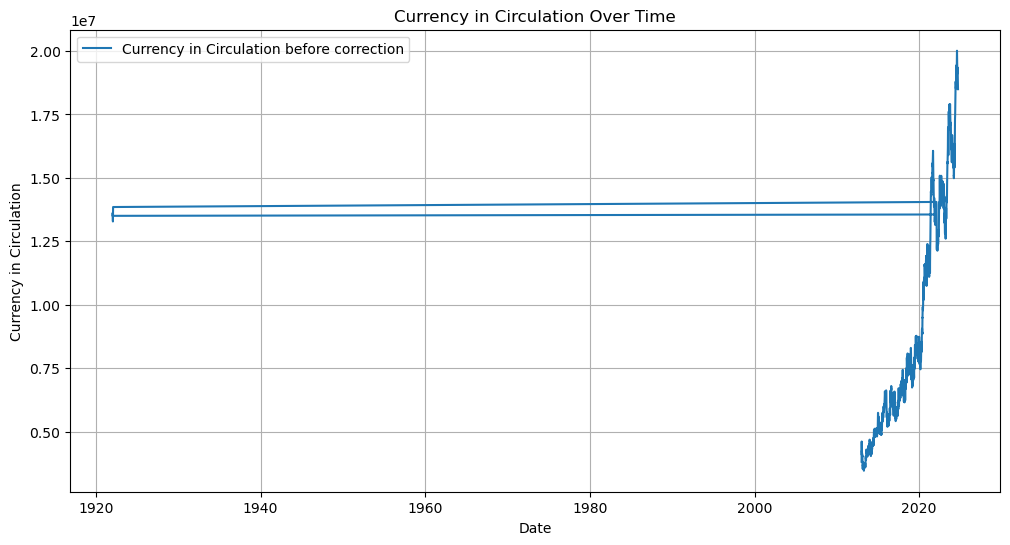

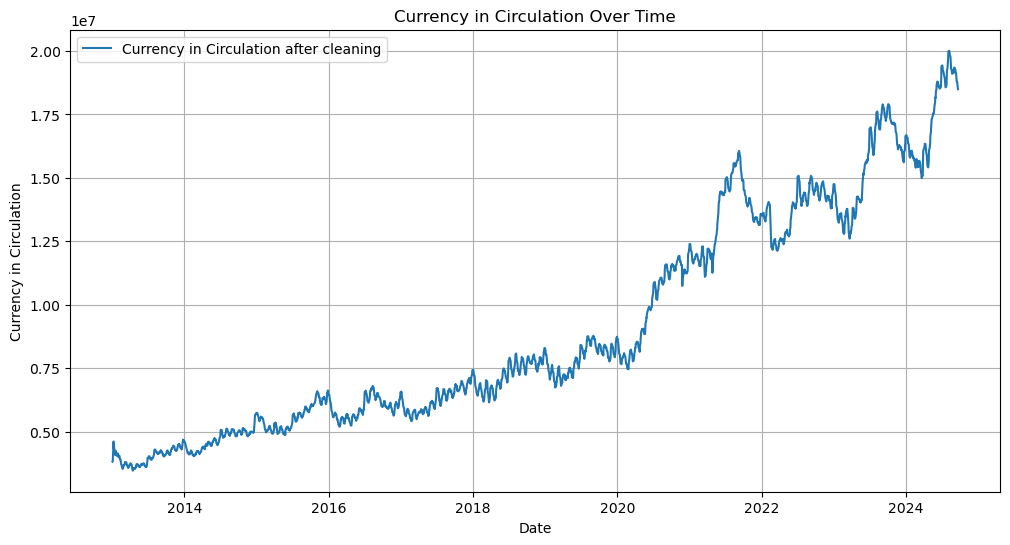

C:\Users\kumar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


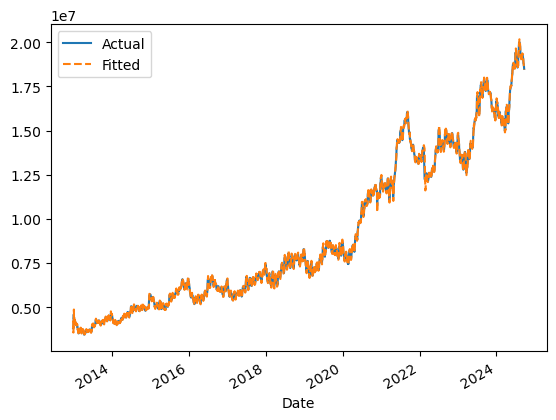

                                    ETS Results                                    
Dep. Variable:     Currency_in_Circulation   No. Observations:                 2965
Model:                            ETS(AAA)   Log Likelihood              -37951.184
Date:                     Mon, 28 Oct 2024   AIC                          75938.369
Time:                             19:20:32   BIC                          76046.272
Sample:                                  0   HQIC                         75977.204
                                    - 2965   Scale                   7677599159.301
Covariance Type:                    approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.9849      0.027     36.040      0.000       0.931       1.038
smoothing_trend         0.3892      0.039     10.040      0.000 

In [3]:
import pandas as pd
from ets_mod import ETS_Model
import matplotlib.pyplot as plt


# Load the dataset from the specified sheet and columns
file_path = 'Q1_data.xlsx'
data = pd.read_excel(file_path, sheet_name=0, usecols=["Date", "Currency_in_Circulation"])

# Convert 'Currency_in_Circulation' to numeric, coercing errors to NaN, then drop NaN values
data['Currency_in_Circulation'] = pd.to_numeric(data['Currency_in_Circulation'], errors='coerce')
data = data.dropna(subset=['Currency_in_Circulation'])

# Ensure the "Date" column is treated as a datetime object, with errors coerced to NaT
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Plot Currency in Circulation
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Currency_in_Circulation'], label="Currency in Circulation before correction")
plt.xlabel("Date")
plt.ylabel("Currency in Circulation")
plt.title("Currency in Circulation Over Time")
plt.legend()
plt.grid()
plt.show()


# Correct dates mistakenly entered as 1922
data['Date'] = data['Date'].apply(lambda x: x.replace(year=2022) if x.year == 1922 else x)

# Drop rows where 'Date' could not be parsed
data = data.dropna(subset=['Date'])

# Plot Currency in Circulation
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Currency_in_Circulation'], label="Currency in Circulation after cleaning")
plt.xlabel("Date")
plt.ylabel("Currency in Circulation")
plt.title("Currency in Circulation Over Time")
plt.legend()
plt.grid()
plt.show()


# Set "Date" column as the index
data.set_index('Date', inplace=True)

# Selecting the "Currency_in_Circulation" series
currency_in_circulation = data['Currency_in_Circulation']

# Instantiate the ETS_Model with an (A,A,A) configuration
ets_model = ETS_Model(currency_in_circulation, error='add', trend='add', seasonal='add', seasonal_periods=12)

# Plot the original data and the ETS model fitted data
ets_model.plot()

# Summary of the model
ets_model.summary()


### Task e 

This section forecasts the currency in circulation for the next 7 days using the ETS model. It prints the forecasted values and plots the actual, fitted, and forecasted values, with the forecast shown in red.


Forecast for the next week:
2024-09-21    1.842874e+07
2024-09-22    1.836630e+07
2024-09-23    1.831326e+07
2024-09-24    1.825181e+07
2024-09-25    1.820481e+07
2024-09-26    1.817684e+07
2024-09-27    1.816729e+07
Freq: D, Name: simulation, dtype: float64


C:\Users\kumar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\kumar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


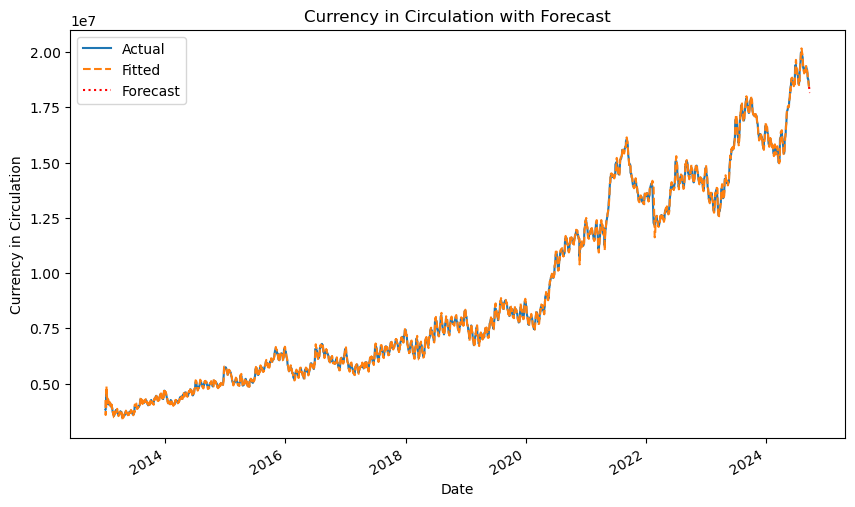

In [5]:
# Forecast the currency in circulation for the next 7 days
forecast = ets_model.forecast(steps=7)
print("Forecast for the next week:")
print(forecast)

# Plotting forecast alongside actual data, with forecasted values in red
plt.figure(figsize=(10, 6))
currency_in_circulation.plot(label='Actual', legend=True)
ets_model.fit.fittedvalues.plot(label='Fitted', linestyle="--", legend=True)
forecast.plot(label='Forecast', color='red', linestyle=":", legend=True)
plt.title("Currency in Circulation with Forecast")
plt.xlabel("Date")
plt.ylabel("Currency in Circulation")
plt.legend()
plt.show()


### Task g: Forecasting the Currency in Circulation Using LSTM Model

In this task, we aim to forecast the currency in circulation for the next week using a Long Short-Term Memory (LSTM) model. The process involves scaling the data, creating sequences for model input, building and training the LSTM model, and finally generating predictions for the next 7 days. The model is trained on historical data to capture temporal patterns, making it suitable for forecasting tasks.


Epoch 1/50


C:\Users\kumar\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0281 - val_loss: 0.0012
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.9173e-04 - val_loss: 0.0012
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.1420e-04 - val_loss: 0.0022
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0010 - val_loss: 9.0661e-04
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.5000e-04 - val_loss: 8.2668e-04
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.8093e-04 - val_loss: 0.0022
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.1333e-04 - val_loss: 7.8713e-04
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.4736e-04 - val_loss: 8.7191e-04
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.6290e-04 - val_loss: 0.0023
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.1605e-04 - val_loss: 0.0010
Epoch 12/50
74/74 ━━━━━━━━

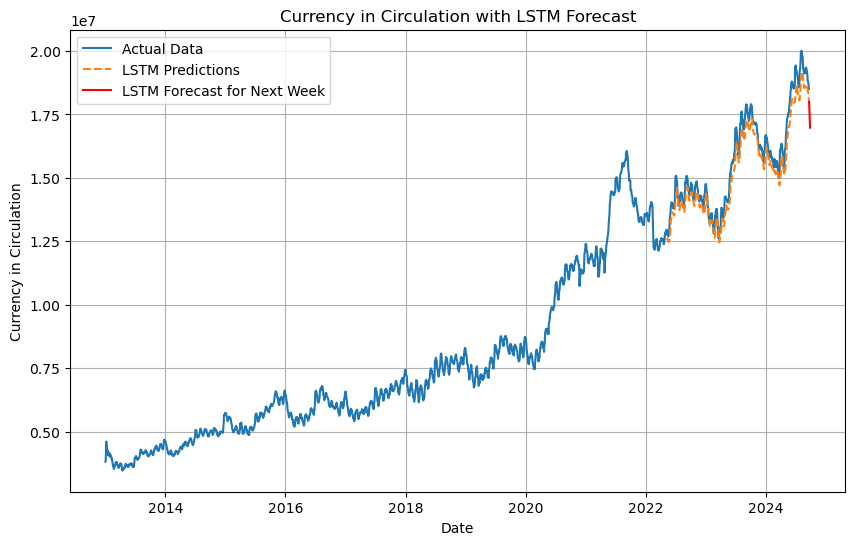

LSTM Forecast for the next 7 days:
              Forecast
2024-09-21  18012260.0
2024-09-22  17874230.0
2024-09-23  17700642.0
2024-09-24  17514058.0
2024-09-25  17327642.0
2024-09-26  17148396.0
2024-09-27  16979466.0


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Reshape data for LSTM input
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_currency_data = scaler.fit_transform(currency_in_circulation.values.reshape(-1, 1))

# Create sequences for the LSTM model
def create_sequences(data, seq_length=30):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

sequence_length = 30  # Using the past 30 days to predict the next day
x, y = create_sequences(scaled_currency_data, sequence_length)

# Split data into training and testing sets
split = int(0.8 * len(x))
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), verbose=1)

# Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  # Inverse scale predictions for readability
y_test = scaler.inverse_transform(y_test)  # Inverse scale y_test for comparison

# Initialize the forecast sequence from the last known data in the training set
forecast_sequence = scaled_currency_data[-sequence_length:]  # shape (sequence_length, 1)
forecast_sequence = forecast_sequence.reshape((1, sequence_length, 1))  # reshape to (1, sequence_length, 1)

# Forecast for the next 7 days
future_forecast = []
for _ in range(7):
    pred = model.predict(forecast_sequence)  # shape (1, 1)
    future_forecast.append(pred[0, 0])  # Extract scalar prediction
    # Update forecast_sequence by appending pred and removing the first element
    forecast_sequence = np.append(forecast_sequence[:, 1:, :], [[[pred[0, 0]]]], axis=1)

# Inverse transform the forecast back to original scale
future_forecast = scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(currency_in_circulation.index, currency_in_circulation.values, label='Actual Data')
plt.plot(currency_in_circulation.index[-len(predictions):], predictions, label='LSTM Predictions', linestyle="--")
plt.plot(pd.date_range(currency_in_circulation.index[-1] + pd.Timedelta(days=1), periods=7, freq='D'),
         future_forecast, label='LSTM Forecast for Next Week', color='red')
plt.xlabel("Date")
plt.ylabel("Currency in Circulation")
plt.title("Currency in Circulation with LSTM Forecast")
plt.legend()
plt.grid()
plt.show()

# Print the forecast for the next week
print("LSTM Forecast for the next 7 days:")
print(pd.DataFrame(future_forecast, columns=["Forecast"], index=pd.date_range(currency_in_circulation.index[-1] + pd.Timedelta(days=1), periods=7)))
